## Supraja Rapuru - DSC 630 - Assignment 4.2

## Clustering Exercise

In [41]:
#Import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler as ss
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA as PCA
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sn
from yellowbrick.cluster import SilhouetteVisualizer
import numpy as np
import seaborn as sns

In [42]:
# import the dataset
als = pd.read_csv("als_data.csv")

In [43]:
als.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


## Exploratory Analysis:

In [44]:
# statistical information about data
als.describe(include='all')

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,1214.874944,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,...,136.755061,0.015000,498880.290148,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,696.678300,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,...,2.715247,0.009283,289923.528450,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,1.000000,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,...,112.000000,0.000000,533.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000
25%,614.500000,47.000000,45.000000,42.000000,39.000000,0.009042,-1.086310,29.000000,23.000000,14.000000,...,135.000000,0.010582,240825.500000,5.000000,3.000000,1.000000,0.003643,6.000000,5.000000,5.000000
50%,1213.000000,55.000000,47.000000,44.000000,41.000000,0.012111,-0.620748,33.000000,28.000000,20.000000,...,137.000000,0.013123,496835.000000,7.000000,5.000000,3.000000,0.006920,7.000000,6.000000,5.000000
75%,1815.500000,63.000000,49.000000,46.000000,43.000000,0.015873,-0.283832,36.000000,32.000000,27.000000,...,138.000000,0.017278,750300.500000,8.000000,6.500000,5.000000,0.009639,7.000000,6.000000,5.000000
max,2424.000000,81.000000,70.300000,51.100000,49.000000,0.243902,1.207011,40.000000,40.000000,40.000000,...,145.000000,0.142857,999482.000000,8.000000,8.000000,8.000000,0.042017,9.000000,9.000000,8.000000


The data set has lot of aggregated variables such as min, mix,median,mean. I think either using mean or median would do. Other attributes cna be dropped for futher analysis. Also there is ID and Subject ID, they also could be dropped as they are not providing any meaningful info to the dataset.

<AxesSubplot:>

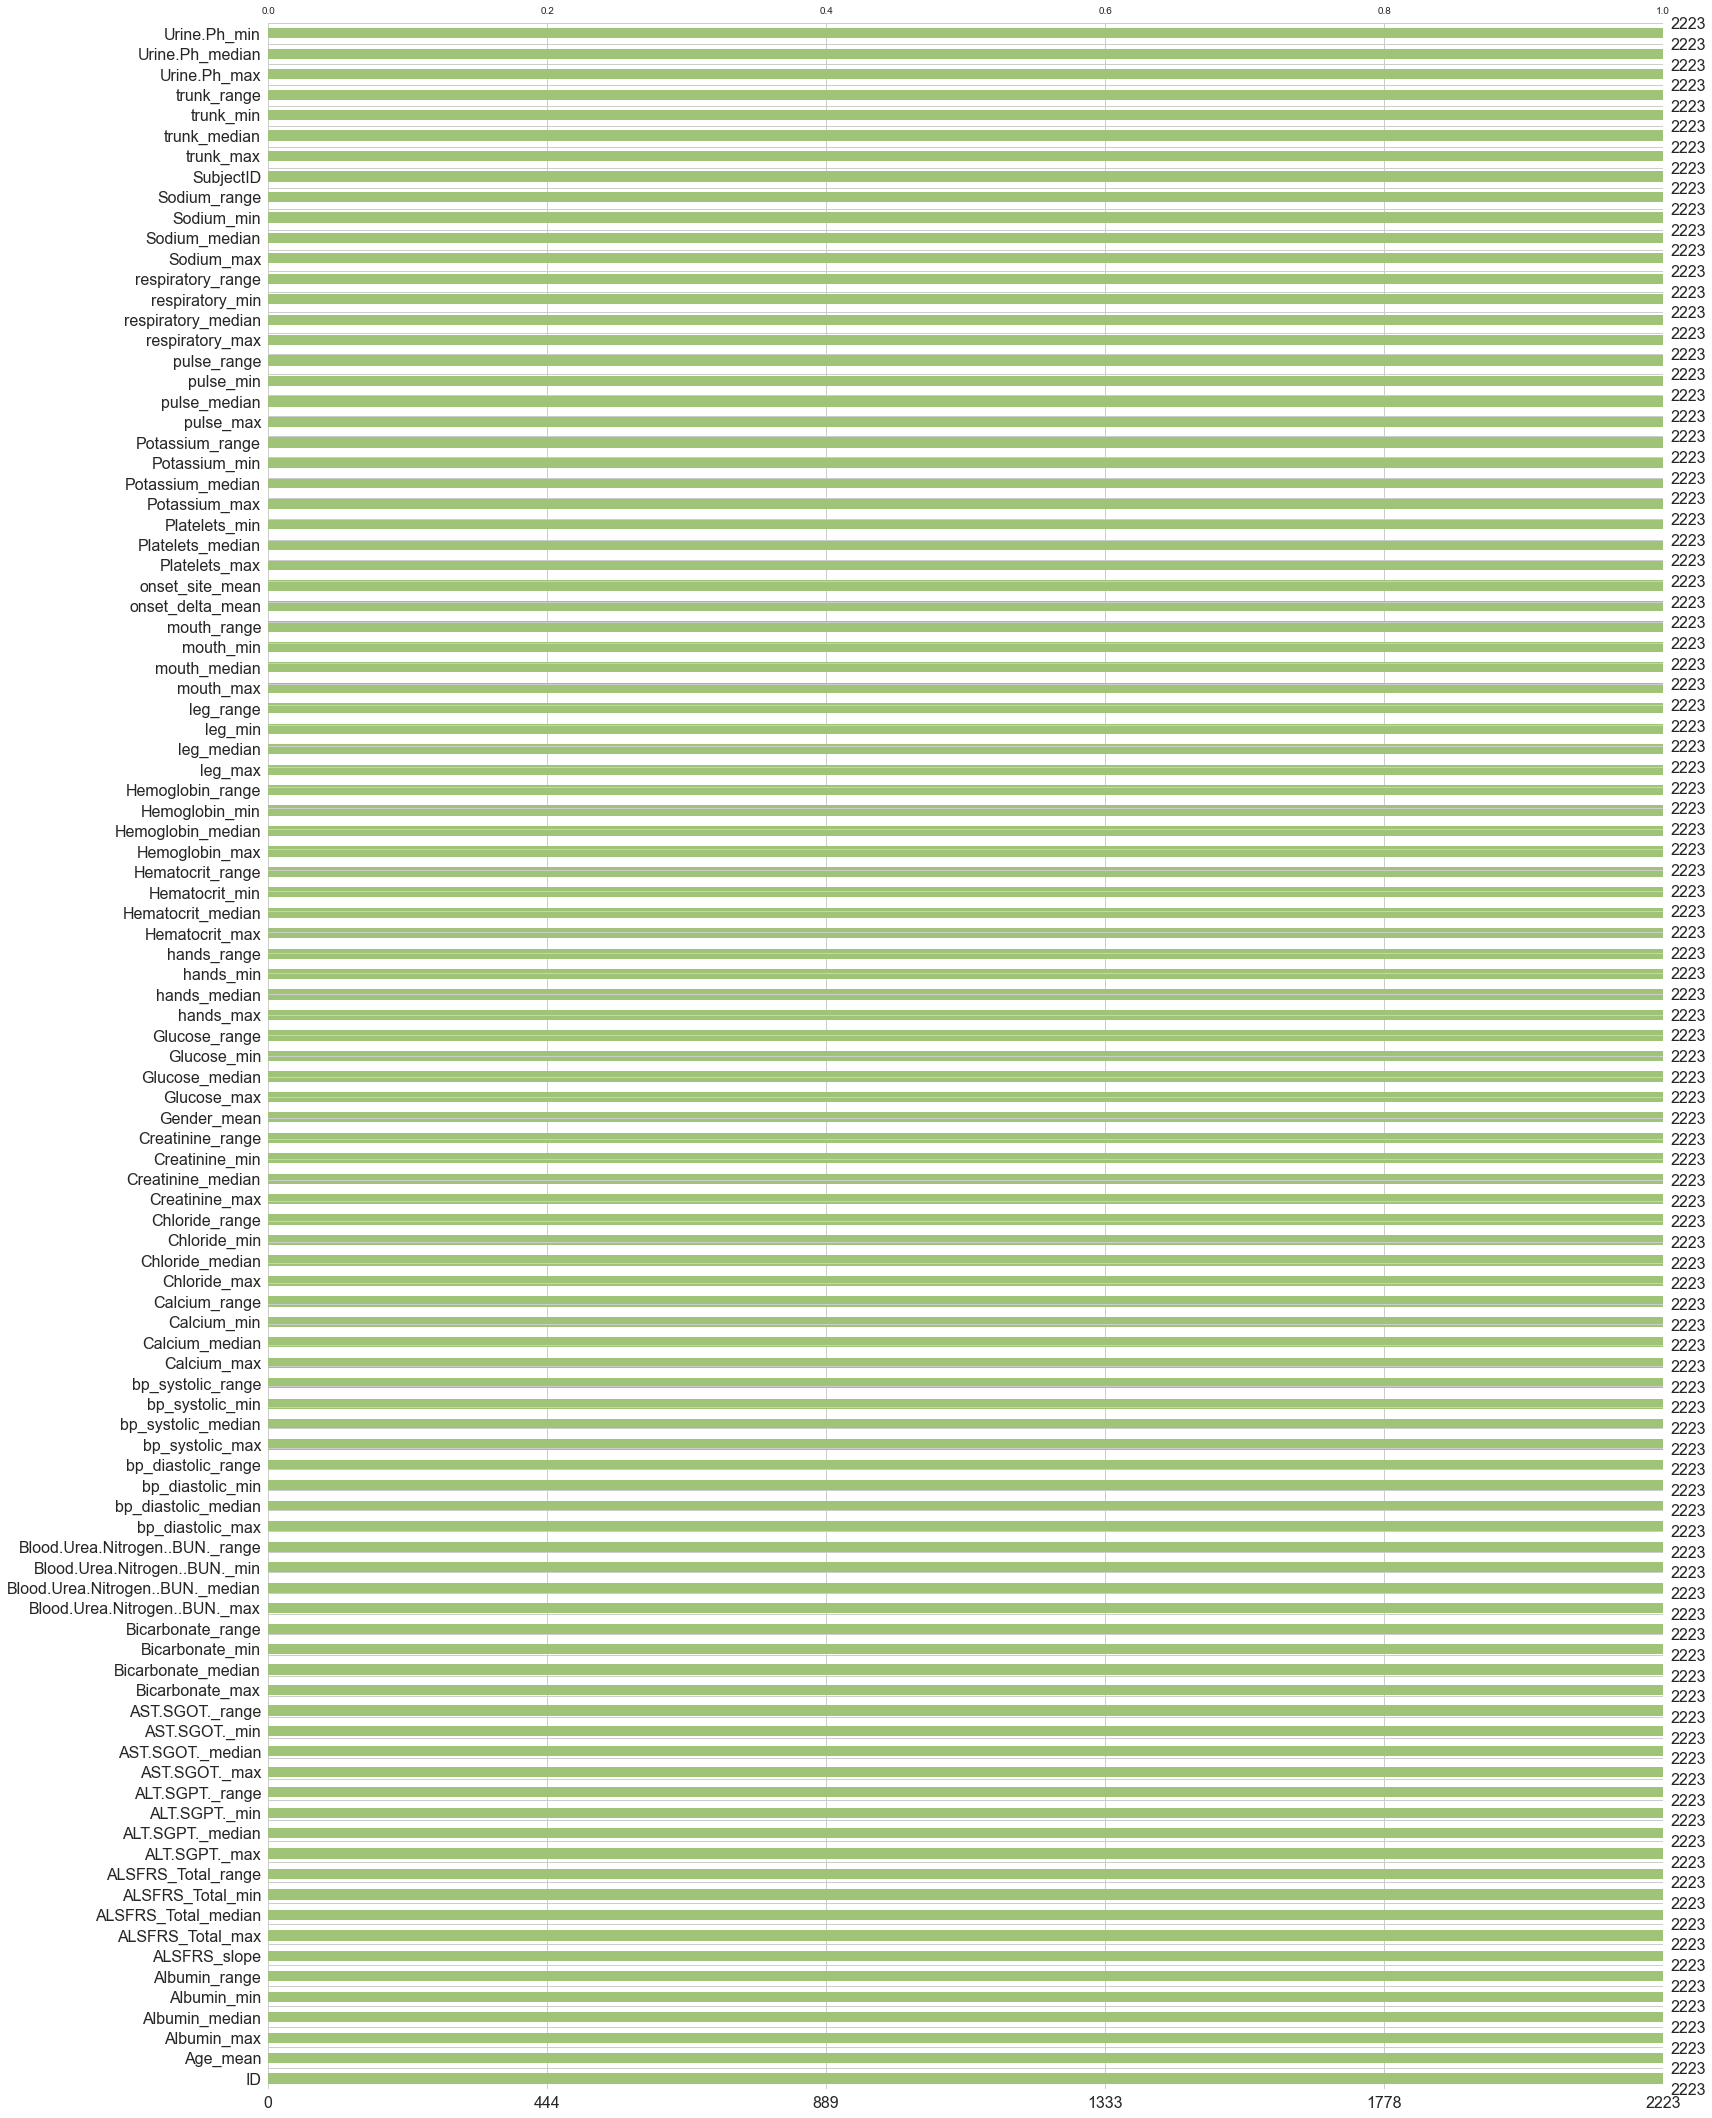

In [45]:
# see if any missing values in thye data
import missingno as msno
msno.bar(als, color='g')

Based on above bar charts we can see that there are no missing values in the data set

In [46]:
## Create new data frame with relevant columns - only taking median attributes as it summarizes the data well
als_df = als.filter(['Age_mean','Albumin_median','ALSFRS_Total_median','ALT.SGPT._median','AST.SGOT._median'
'Bicarbonate_median',
'Blood.Urea.Nitrogen',
'BUN._median',
'bp_diastolic_median',
'bp_systolic_median',
'Calcium_median',
'Chloride_median',
'Creatinine_median',
'Glucose_median',
'hands_median',
'Hematocrit_median',
'Hemoglobin_median',
'leg_median',
'mouth_median',
'Platelets_median',
'Potassium_median',
'pulse_median',
'respiratory_median',
'Sodium_median',
'trunk_median',
'Urine.Ph_median'
])

In [47]:
als_df.head()

,Age_mean,Albumin_median,ALSFRS_Total_median,ALT.SGPT._median,bp_diastolic_median,bp_systolic_median,Calcium_median,Chloride_median,Creatinine_median,Glucose_median,...,Hemoglobin_median,leg_median,mouth_median,Platelets_median,Potassium_median,pulse_median,respiratory_median,Sodium_median,trunk_median,Urine.Ph_median
0,65,40.5,28.0,22.0,83.0,139.0,2.220550,108.0,79.56,4.4955,...,146.0,6.5,3.5,169.0,4.25,68.0,3.0,145.5,7.0,6.0
1,48,41.0,33.0,13.0,78.0,132.5,2.170650,102.0,53.04,4.9950,...,132.0,7.5,8.0,264.0,4.30,76.0,4.0,138.0,7.0,5.0
2,38,47.0,14.0,20.0,76.0,110.0,2.295400,106.0,79.56,5.1060,...,154.0,3.0,7.0,213.0,4.00,73.0,4.0,143.0,0.0,5.0
3,63,44.0,29.0,60.0,80.0,130.0,2.345300,107.0,61.88,4.7730,...,145.0,3.5,12.0,233.0,4.20,72.0,3.0,139.0,5.0,6.0
4,63,45.5,27.5,26.5,80.0,130.0,2.257975,104.0,48.62,5.7165,...,146.5,2.0,12.0,283.5,3.75,96.0,4.0,140.0,4.0,5.0


In [48]:
## Initialize standard scaler
scaler = ss()
## Scale data frame
scaled_df = scaler.fit_transform(als_df)

In [49]:
scaled_df

array([[ 0.91713698, -1.30078105,  0.13495988, ...,  2.99234197,
         0.98183247,  0.46305355],
       [-0.57487867, -1.11240084,  0.88886316, ..., -1.19881209,
         0.98183247, -1.13720768],
       [-1.45253494,  1.14816173, -1.97596931, ...,  1.59529062,
        -2.28066914, -1.13720768],
       ...,
       [-0.6626443 ,  0.01788044, -0.6189434 , ...,  0.47764953,
        -0.41638251,  0.46305355],
       [-1.54030057,  0.01788044,  0.36113086, ..., -0.63999155,
        -0.18334668, -1.13720768],
       [-0.57487867,  0.39464087,  1.03964381, ...,  0.47764953,
         1.44790413, -1.13720768]])

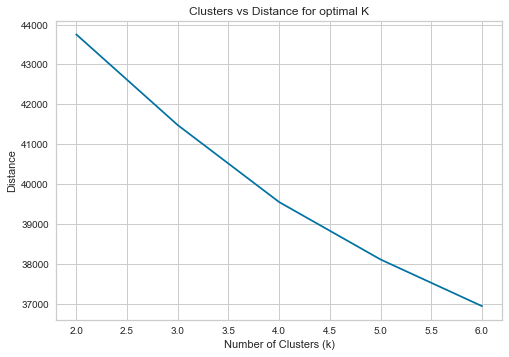

In [50]:
## Create elbow plot of distance vs clusters using 6 clusters as test range
cluster_range = [2, 3, 4, 5, 6]

## Place holder for distance calculation
avg_distance = []
score = []

## Try for all 6 test range clusters
for n in cluster_range:
    clusterer = KMeans(n_clusters=n, random_state=1).fit(scaled_df)
    avg_distance.append(clusterer.inertia_)
    score.append(silhouette_score(scaled_df, clusterer.labels_, metric='euclidean'))

## Plot Elbow method for optimal K
plt.title('Clusters vs Distance for optimal K')
plt.plot(cluster_range, avg_distance)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()

The Elbow Curve method is helpful because it shows how increasing the number of the clusters contribute separating the clusters in a meaningful way, not in a marginal way.
The values for K seem to be betweein 2 & 5. Further analysis will help determine the appropriate value for clustering.

Silhoute scores should help in teasing out the appropriate K value

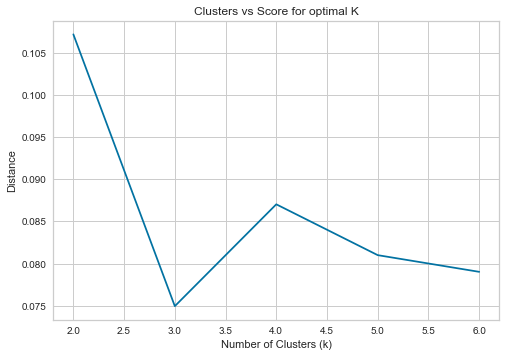

In [51]:
## plot Silhouette score for optimal K
plt.title('Clusters vs Score for optimal K')
plt.plot(cluster_range, score)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()

Two clusters have the highest silhoute scores, followed by 4 clusters.

In [52]:
### Lets visualize the clusters in range of silhouette

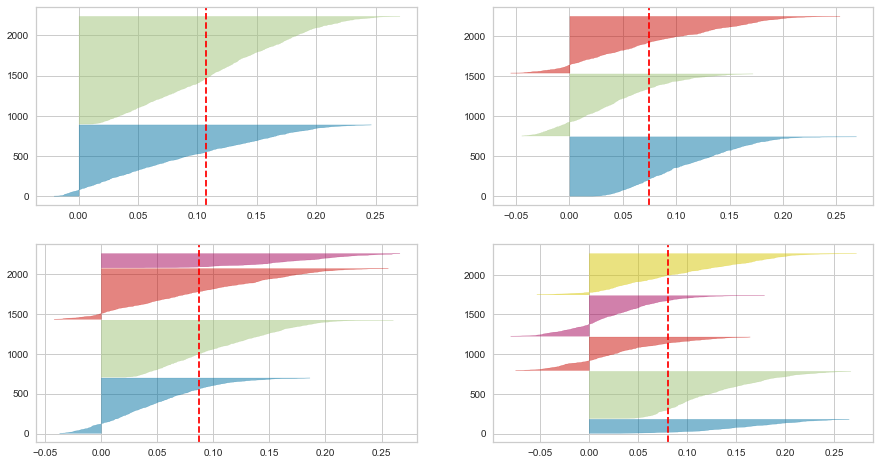

In [53]:
## Test range of cluster numbers
cluster_range = [2, 3, 4,5]

## Initialize plots
fig, ax = plt.subplots(2, 2, figsize=(15,8))

## Try all cluster numbers in range for silhouette visualizer
for n in cluster_range:
        km = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=100, random_state=1)
        q, mod = divmod(n, 2)
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
        visualizer.fit(scaled_df)

The average silhoutte score line misses more datapoints with 4 clusters than with 2 clusters. Therefore, for the current dataset 2 clusters seem to work better

In [54]:
df_scale2 = scaled_df.copy()
kmeans_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(df_scale2)
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(df_scale2, kmeans_scale.labels_, metric='euclidean')))
labels_scale = kmeans_scale.labels_

KMeans Scaled Silhouette Score: 0.08584011089777781


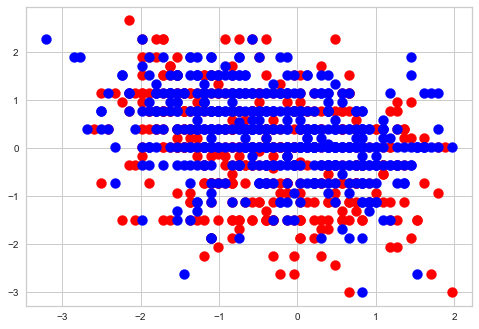

In [55]:
## Initialize KMeans model with 6 clusters and fit_predict
model = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
model_pred = model.fit_predict(scaled_df)

# Plot the KMeans data
plt.scatter(scaled_df[model_pred==0, 0], scaled_df[model_pred==0, 1], s=100, c='red', label='cluster1')
plt.scatter(scaled_df[model_pred==1, 0], scaled_df[model_pred==1, 1], s=100, c='blue', label='cluster1')

We can determine the optimal number of Principal components by using the plot below. In the earlier step, the number of principal components was arbitrary.

In [56]:
## Initialize sklearn PCA
pca = PCA(n_components=3)

## Fit transform the PCA to the scaled data
components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data = components, columns=['pc1', 'pc2', 'pc3'])
final_df = pd.concat([pca_df, pd.Series(model_pred)], axis=1).set_axis(['pc1', 'pc2', 'pc3','label'], axis=1)

In [57]:
print(pca.explained_variance_ratio_)

[0.15571623 0.10159329 0.08344945]


Text(0, 0.5, 'Inertia')

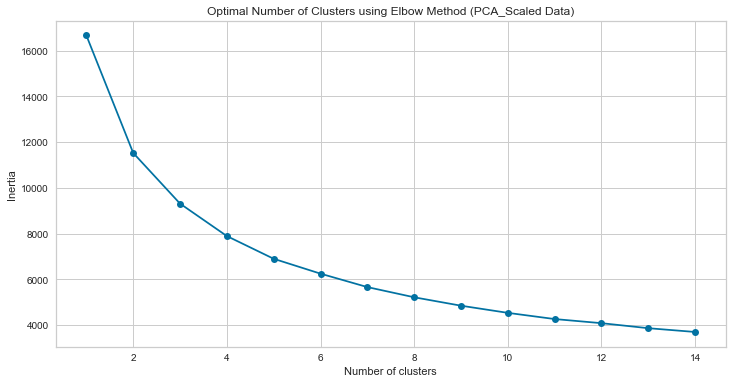

In [58]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(pca_df)
    sse.append([k, km.inertia_])
    
pca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (PCA_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

The plot indicates that 2 is still a good number of clusters for the dataset.

In [59]:
kmeans_pca_scale = KMeans(n_clusters=2, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(pca_df)
print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df, kmeans_pca_scale.labels_, metric='euclidean')))
labels_pca_scale = kmeans_pca_scale.labels_
clusters_pca_scale = pd.concat([pca_df, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

KMeans PCA Scaled Silhouette Score: 0.28664182699217367


One can see that the silhouette score improved by passing a lower dimensional data through the K_means algorithm.

C:\Users\Supraja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


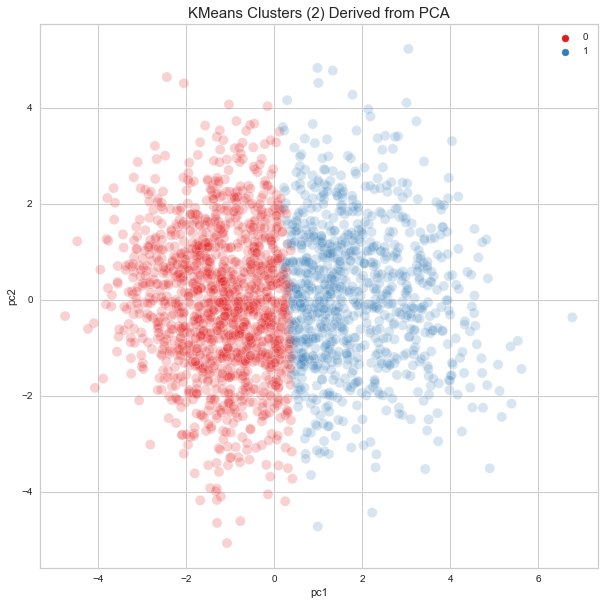

In [60]:
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_pca_scale.iloc[:,0],clusters_pca_scale.iloc[:,1], hue=labels_pca_scale, palette='Set1', s=100, alpha=0.2).set_title('KMeans Clusters (2) Derived from PCA', fontsize=15)
plt.legend()
plt.show()

After applying kmeans clustering and PCA, two almost distinct groups in the ALS data have been indentified. From the visualization above, there seems to be little overalp in center but not visible datapoints out of place from the groupings.